In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [24]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import matplotlib.pyplot as plt

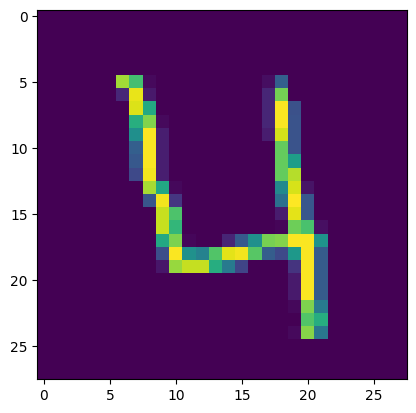

In [26]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28))

In [27]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn= KNeighborsClassifier()

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9648809523809524

In [34]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [35]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [36]:
#PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=100)

In [37]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [38]:
x_train_trf.shape

(33600, 100)

In [39]:
knn=KNeighborsClassifier()

In [40]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [41]:
y_pred=knn.predict(x_test_trf)

In [42]:
accuracy_score(y_pred,y_test)

0.9532142857142857

In [47]:
for i in (1,784):
    pca=PCA(n_components=i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf=pca.transform(x_test)
    knn=KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred=knn.predict(x_test_trf)
    print(accuracy_score(y_pred,y_test))

0.2580952380952381
0.9391666666666667


In [48]:
pca=PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [52]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter(
    x=x_train_trf[:, 0],
    y=x_train_trf[:, 1],
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()



In [55]:
pca=PCA(n_components=3)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [57]:
y_train_trf=y_train.astype(str)
fig = px.scatter_3d(
    x=x_train_trf[:, 0],
    y=x_train_trf[:, 1],
    z=x_train_trf[:, 2],
    color=y_train_trf
)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [58]:
pca.explained_variance_

array([40.67111198, 29.17023353, 26.74459581])

In [61]:
pca.components_

array([[-1.20369910e-18,  1.99976541e-18, -7.73529006e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.81030191e-18, -3.84792671e-17,  1.63780217e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.25517595e-17,  2.04477093e-17, -7.03981526e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [62]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [63]:
pca=PCA(n_components=None)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

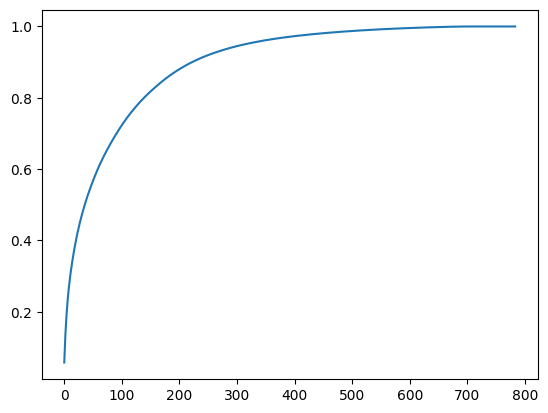

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))